In [156]:
import numpy as np
import tensorflow as tf
import cv2
import matplotlib.pyplot as plt
import keras.models
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten, GaussianNoise
from keras import metrics
from keras.utils.vis_utils import plot_model
import os
from skimage.util import random_noise

In [178]:
# Key:
# 0 - Down
# 1 - Up
# 2 - Wave

small_to_large_image_size_ratio = 0.05

X_train = []
X_test = []
Y_train = []
Y_test = []

source_directory = "dataset/thumbsdown/KeyFrames/train"
for filename in os.listdir(source_directory):
    image = cv2.imread(source_directory + "/" + filename)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)


    image = cv2.resize(image,  # original image
                           (0, 0),  # set fx and fy, not the final size
                           fx=small_to_large_image_size_ratio,
                           fy=small_to_large_image_size_ratio,
                           interpolation=cv2.INTER_NEAREST)
    # image = random_noise(image, mode='s&p', amount=0.011)

    X_train.append(image)
    Y_train.append(0)

source_directory = "dataset/thumbsup/KeyFrames/train"
for filename in os.listdir(source_directory):
    image = cv2.imread(source_directory + "/" + filename)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    image = cv2.resize(image,  # original image
                           (0, 0),  # set fx and fy, not the final size
                           fx=small_to_large_image_size_ratio,
                           fy=small_to_large_image_size_ratio,
                           interpolation=cv2.INTER_NEAREST)
    # image = random_noise(image, mode='s&p', amount=0.011)

    X_train.append(image)
    Y_train.append(1)

source_directory = "dataset/wave/KeyFrames/train"
for filename in os.listdir(source_directory):
    image = cv2.imread(source_directory + "/" + filename)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    image = cv2.resize(image,  # original image
                           (0, 0),  # set fx and fy, not the final size
                           fx=small_to_large_image_size_ratio,
                           fy=small_to_large_image_size_ratio,
                           interpolation=cv2.INTER_NEAREST)
    # image = random_noise(image, mode='s&p', amount=0.011)

    X_train.append(image)
    Y_train.append(2)

source_directory = "dataset/thumbsdown/KeyFrames/test"
for filename in os.listdir(source_directory):
    image = cv2.imread(source_directory + "/" + filename)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    image = cv2.resize(image,  # original image
                           (0, 0),  # set fx and fy, not the final size
                           fx=small_to_large_image_size_ratio,
                           fy=small_to_large_image_size_ratio,
                           interpolation=cv2.INTER_NEAREST)
    # image = random_noise(image, mode='s&p', amount=0.011)

    X_test.append(image)
    Y_test.append(0)

source_directory = "dataset/thumbsup/KeyFrames/test"
for filename in os.listdir(source_directory):
    image = cv2.imread(source_directory + "/" + filename)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    image = cv2.resize(image,  # original image
                           (0, 0),  # set fx and fy, not the final size
                           fx=small_to_large_image_size_ratio,
                           fy=small_to_large_image_size_ratio,
                           interpolation=cv2.INTER_NEAREST)
    # image = random_noise(image, mode='s&p', amount=0.011)

    X_test.append(image)
    Y_test.append(1)

source_directory = "dataset/wave/KeyFrames/test"
for filename in os.listdir(source_directory):
    image = cv2.imread(source_directory + "/" + filename)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    image = cv2.resize(image,  # original image
                           (0, 0),  # set fx and fy, not the final size
                           fx=small_to_large_image_size_ratio,
                           fy=small_to_large_image_size_ratio,
                           interpolation=cv2.INTER_NEAREST)
    # image = random_noise(image, mode='s&p', amount=0.011)
    X_test.append(image)
    Y_test.append(2)


print(np.shape(X_train))
print(np.shape(X_test))

(1855, 54, 96)
(219, 54, 96)


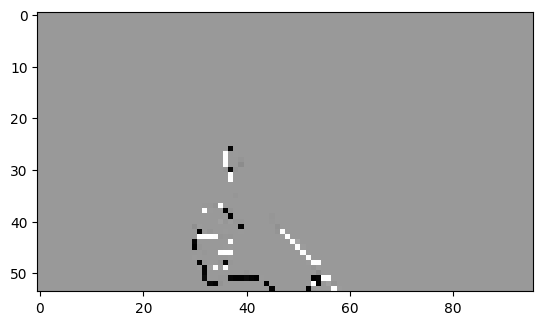

In [179]:
train_size = np.shape(X_train)
imheight = train_size[1]
imwidth = train_size[2]
train_size = train_size[0]
test_size = np.shape(X_test)[0]

X_train = np.array(X_train)
X_test = np.array(X_test)
Y_train = np.array(Y_train)
Y_test = np.array(Y_test)

X_train = X_train.reshape(train_size, imheight, imwidth, 1)
X_test = X_test.reshape(test_size, imheight, imwidth, 1)
Y_train = Y_train.reshape(train_size)
Y_test = Y_test.reshape(test_size)

plt.imshow(X_test[100].reshape(imheight, imwidth),cmap='Greys')

In [184]:
model = Sequential()

# add model layers
model.add(GaussianNoise(0.01, input_shape=(imheight, imwidth, 1)))
model.add(Conv2D(8, kernel_size=3, activation='relu', input_shape=(imheight, imwidth, 1)))
model.add(Conv2D(4, kernel_size=5, activation='relu'))
model.add(Conv2D(2, kernel_size=7, activation='relu'))
model.add(Dropout(0.05))
model.add(Flatten())
model.add(Dense(3, activation='softmax'))
model.summary()
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

Model: "sequential_27"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gaussian_noise_9 (GaussianN  (None, 54, 96, 1)        0         
 oise)                                                           
                                                                 
 conv2d_69 (Conv2D)          (None, 52, 94, 8)         80        
                                                                 
 conv2d_70 (Conv2D)          (None, 48, 90, 4)         804       
                                                                 
 conv2d_71 (Conv2D)          (None, 42, 84, 2)         394       
                                                                 
 dropout_23 (Dropout)        (None, 42, 84, 2)         0         
                                                                 
 flatten_23 (Flatten)        (None, 7056)              0         
                                                     

In [185]:
n_epochs = 10
history = model.fit(x=X_train,y=Y_train, epochs=n_epochs)

Epoch 1/10
58/58 [==============================] - 5s 72ms/step - loss: 2.6814 - accuracy: 0.4528
Epoch 2/10
58/58 [==============================] - 4s 72ms/step - loss: 0.6790 - accuracy: 0.6933
Epoch 3/10
58/58 [==============================] - 4s 71ms/step - loss: 0.3737 - accuracy: 0.8555
Epoch 4/10
58/58 [==============================] - 4s 71ms/step - loss: 0.2032 - accuracy: 0.9299
Epoch 5/10
58/58 [==============================] - 4s 71ms/step - loss: 0.1129 - accuracy: 0.9660
Epoch 6/10
58/58 [==============================] - 4s 72ms/step - loss: 0.0630 - accuracy: 0.9871
Epoch 7/10
58/58 [==============================] - 4s 71ms/step - loss: 0.0320 - accuracy: 0.9951
Epoch 8/10
58/58 [==============================] - 4s 71ms/step - loss: 0.0177 - accuracy: 0.9978
Epoch 9/10
58/58 [==============================] - 4s 71ms/step - loss: 0.0107 - accuracy: 0.9989
Epoch 10/10
58/58 [==============================] - 4s 71ms/step - loss: 0.0068 - accuracy: 0.9995


In [186]:
score = model.evaluate(X_test, Y_test)
print('Test accuracy:', score[1])

7/7 [==============================] - 0s 18ms/step - loss: 0.0931 - accuracy: 0.9680
Test accuracy: 0.9680365324020386


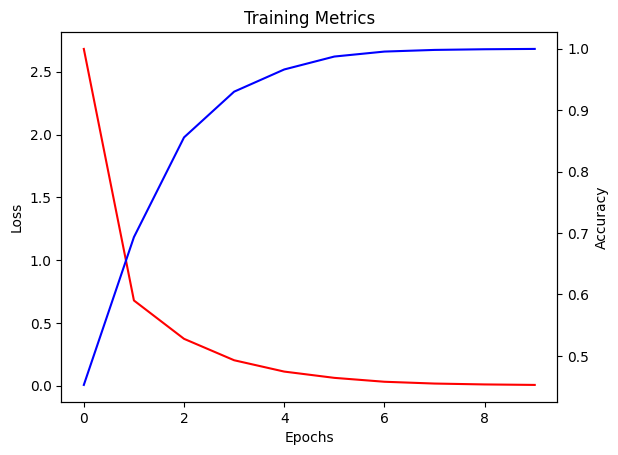

In [191]:
fig, ax = plt.subplots()
ax2 = ax.twinx()
ax.plot(history.history['loss'], color='r')
ax2.plot(history.history['accuracy'], color='b')
ax.set_ylabel('Loss')
ax2.set_ylabel('Accuracy')
ax.title.set_text('Training Metrics')
ax.set_xlabel("Epochs")
# ax.legend(['accuracy', 'loss'], loc='upper right')
plt.show()

In [152]:
model.save("CNN_model")

INFO:tensorflow:Assets written to: CNN_model\assets


INFO:tensorflow:Assets written to: CNN_model\assets


In [153]:
saved_model = keras.models.load_model("CNN_model")
score = saved_model.evaluate(X_test, Y_test)
print('Test accuracy:', score[1])

7/7 [==============================] - 0s 18ms/step - loss: 0.0213 - accuracy: 0.9954
Test accuracy: 0.9954338073730469


In [154]:

def calc_Categorical_Accuracy(test, truth):
    print(len(truth))
    certainty = model.predict(test, verbose=0)
    decision = np.argmax(certainty, axis=1)  # find index of max probability

    categorical_accuracy = np.zeros(shape=(3,))
    for i in range(len(decision)):
      if decision[i] == truth[i]:
          categorical_accuracy[truth[i]] = categorical_accuracy[truth[i]]+1

    for i in range(3):
        num_tests = truth.tolist().count(i)
        categorical_accuracy[i] = categorical_accuracy[i]/num_tests
    return categorical_accuracy

acc = calc_Categorical_Accuracy(X_test, Y_test)
print(acc)

acc = calc_Categorical_Accuracy(X_train, Y_train)
print(acc)

219
[1.         1.         0.98947368]
1855
[0.99833611 1.         1.        ]
